#### Assignment - Perform K Means, Hierarchical, and DBSCAN clustering on a datset of my choice

In [37]:
# Initialise chosen dataset
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("bi.csv", delimiter = ',', encoding="cp1252")
df.head()


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [46]:
# Data formatting
df["prevEducation"] = (df["prevEducation"].str.lower()
                       .map(lambda i: "bachelors" if "b" in i else i)
                       .map(lambda i: "highschool" if "g" in i else i)
                       .map(lambda i: "diploma" if "p" in i else i))

df["residence"] = df["residence"].map(lambda i: "BI Residence" if "B" in i else i)
df["country"] = (df["country"].str.lower()
                 .map(lambda i: "south africa" if "rsa" in i else i)
                 .map(lambda i: "norway" if "norge" in i else i))
# binary encode gender column and one hot encode prevEducation, residence, country

one_encoded = pd.get_dummies(df, columns = ["prevEducation", "residence", "country"], dtype = int)
fully_encoded = one_encoded.copy()
fully_encoded["gender"] = fully_encoded["gender"].str.lower().map(lambda x: 1 if "f" in x else 0)

# drop null and duplicate values, then deal with missing values in Python column
df.dropna()
df.drop_duplicates()

# note - sognsvann is school housing (as opposed to private residence)
        
fully_encoded.head()

,fNAME,lNAME,Age,gender,entryEXAM,studyHOURS,Python,DB,prevEducation_bachelors,prevEducation_diploma,...,country_italy,country_kenya,country_netherlands,country_nigeria,country_norway,country_somali,country_south africa,country_spain,country_uganda,country_uk
0,Christina,Binger,44,1,72,158,59.0,55,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Alex,Walekhwa,60,0,79,150,60.0,75,0,1,...,0,1,0,0,0,0,0,0,0,0
2,Philip,Leo,25,0,55,130,74.0,50,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Shoni,Hlongwane,22,1,40,120,NaN,44,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Maria,Kedibone,23,1,65,122,91.0,80,0,0,...,0,0,0,0,0,0,1,0,0,0


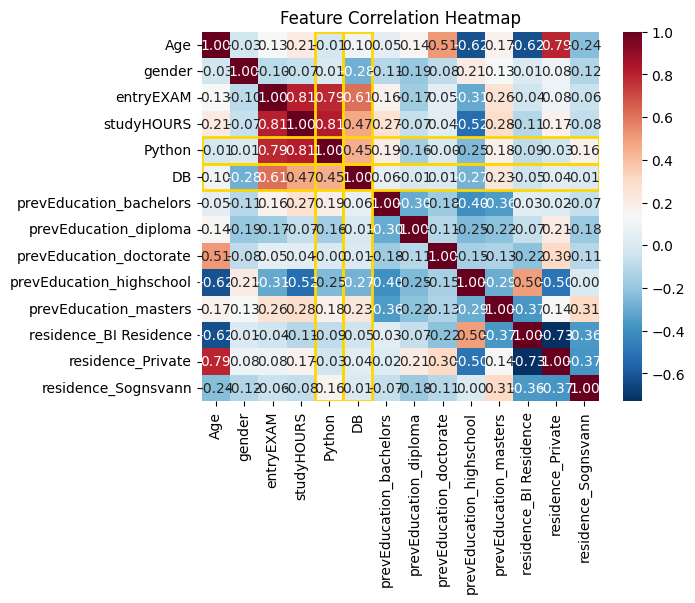

In [47]:
# Multivariate Analysis
numeric_df = fully_encoded.drop(["lNAME","fNAME"], axis = 1)
multi_df = numeric_df.copy()
multi_df = multi_df.drop([col for col in multi_df.columns if "country" in col], axis = 1)
corr = multi_df.corr()
sns.heatmap(corr, annot = True, cmap = 'RdBu_r', fmt = '.2f')


import matplotlib.patches as patches # formatting to highlight target variable

ax = plt.gca()
n = corr.columns.get_loc("Python") 
i = corr.index.get_loc("Python")
border1 = patches.Rectangle((n, 0), 1, corr.shape[0], linewidth = 2, edgecolor = 'gold', facecolor = 'none')
border2 = patches.Rectangle((0, i), corr.shape[0], 1, linewidth = 2, edgecolor = 'gold', facecolor = 'none')
ax.add_patch(border1)
ax.add_patch(border2)

n = corr.columns.get_loc("DB") 
i = corr.index.get_loc("DB")
border3 = patches.Rectangle((n, 0), 1, corr.shape[0], linewidth = 2, edgecolor = 'gold', facecolor = 'none')
border4 = patches.Rectangle((0, i), corr.shape[0], 1, linewidth = 2, edgecolor = 'gold', facecolor = 'none')
ax.add_patch(border3)
ax.add_patch(border4)

plt.title('Feature Correlation Heatmap')
plt.show()

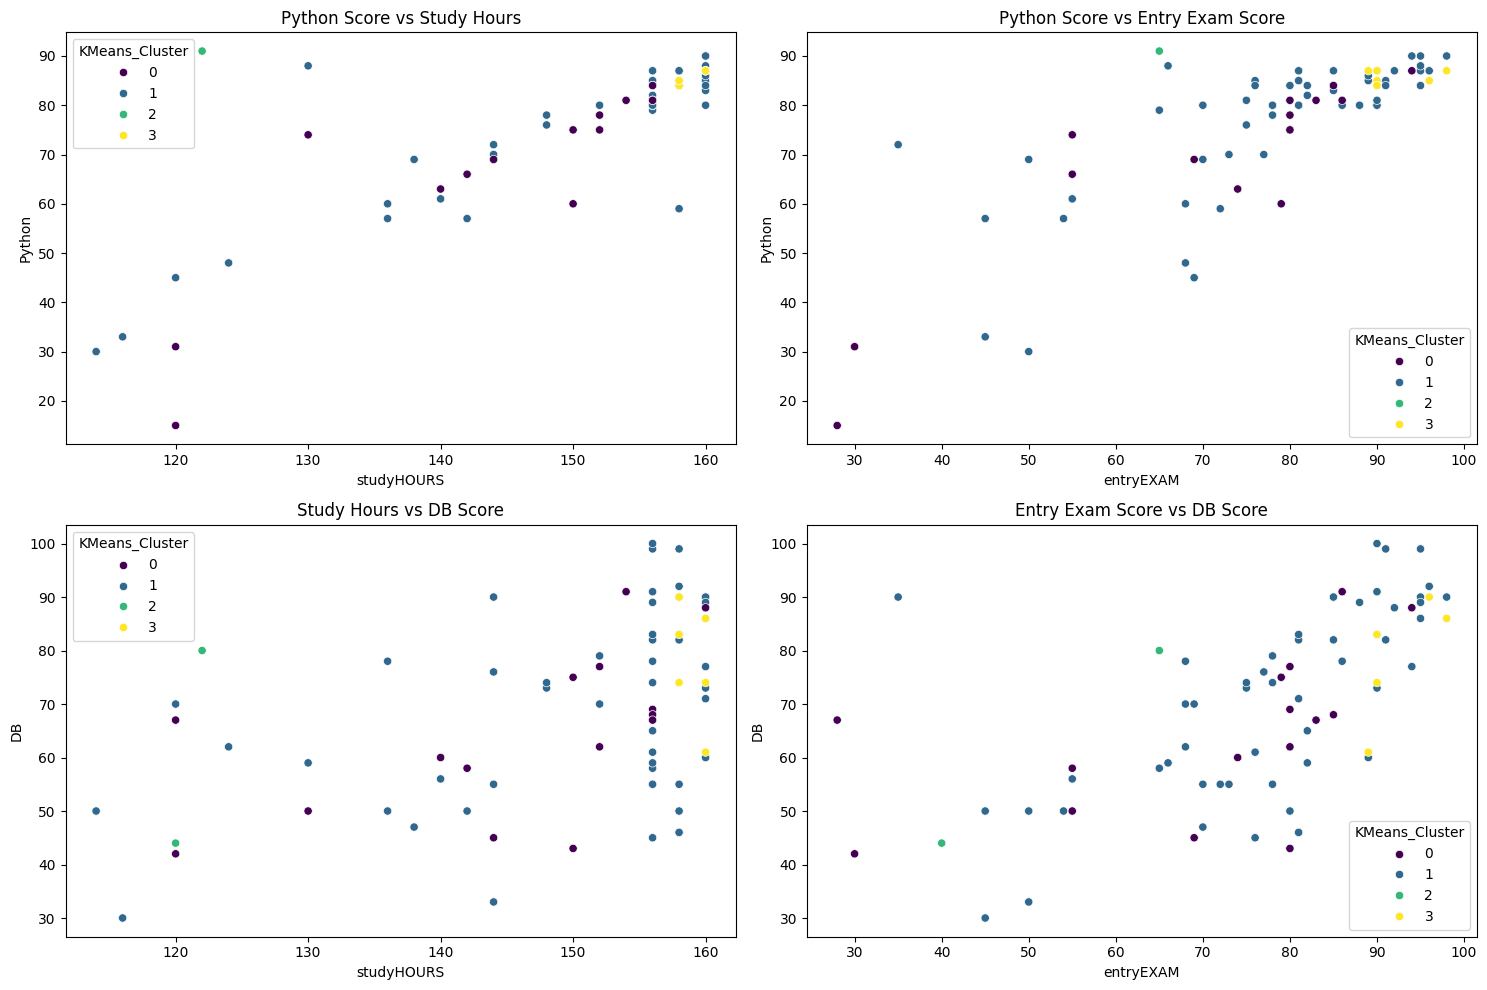

In [87]:
# K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = numeric_df.drop(["Python"], axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X_scaled)
fully_encoded["KMeans_Cluster"] = kmeans.labels_

# Visualise K-means clustering
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Python vs studyHOURS
sns.scatterplot(x="studyHOURS", y="Python", hue="KMeans_Cluster", 
                data=fully_encoded, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Python Score vs Study Hours")

# Plot 2: Python vs entryEXAM
sns.scatterplot(x="entryEXAM", y="Python", hue="KMeans_Cluster", 
                data=fully_encoded, palette="viridis", ax=axes[0,1])
axes[0,1].set_title("Python Score vs Entry Exam Score")

# Plot 3: studyHOURS vs DB
sns.scatterplot(x="studyHOURS", y="DB", hue="KMeans_Cluster", 
                data=fully_encoded, palette="viridis", ax=axes[1,0])
axes[1,0].set_title("Study Hours vs DB Score")

# Plot 4: entryEXAM vs DB
sns.scatterplot(x="entryEXAM", y="DB", hue="KMeans_Cluster", 
                data=fully_encoded, palette="viridis", ax=axes[1,1])
axes[1,1].set_title("Entry Exam Score vs DB Score")

plt.tight_layout()
plt.show()

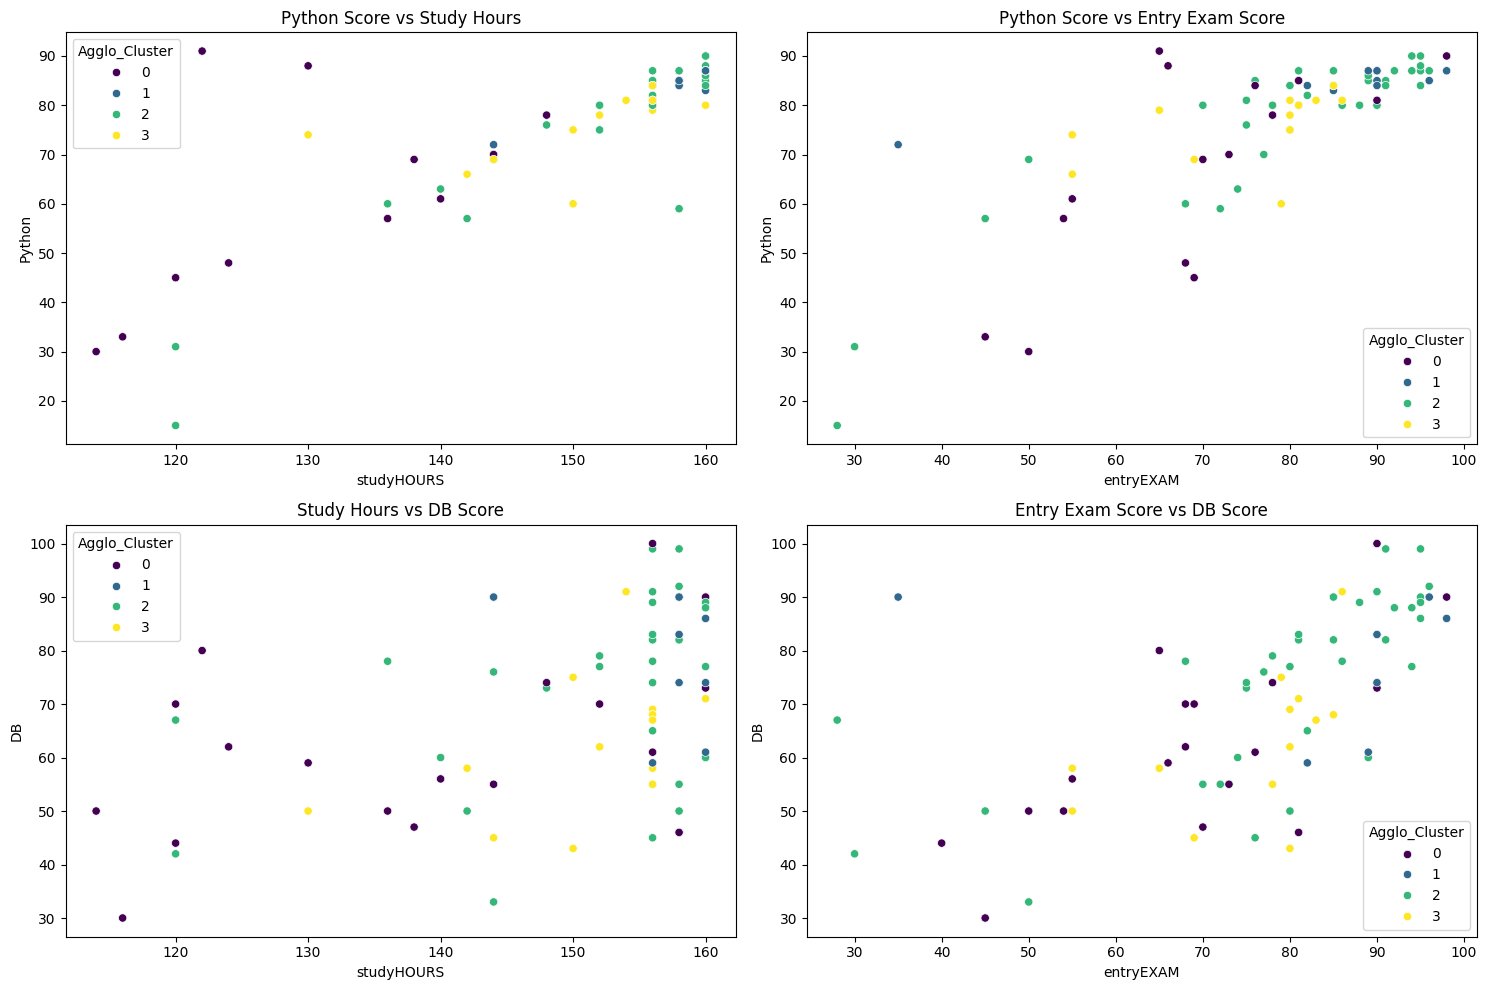

In [88]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters = 4)
fully_encoded["Agglo_Cluster"] = agglo.fit_predict(X_scaled)

# Visualise K-means clustering
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Python vs studyHOURS
sns.scatterplot(x="studyHOURS", y="Python", hue="Agglo_Cluster", 
                data=fully_encoded, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Python Score vs Study Hours")

# Plot 2: Python vs entryEXAM
sns.scatterplot(x="entryEXAM", y="Python", hue="Agglo_Cluster", 
                data=fully_encoded, palette="viridis", ax=axes[0,1])
axes[0,1].set_title("Python Score vs Entry Exam Score")

# Plot 3: studyHOURS vs DB
sns.scatterplot(x="studyHOURS", y="DB", hue="Agglo_Cluster", 
                data=fully_encoded, palette="viridis", ax=axes[1,0])
axes[1,0].set_title("Study Hours vs DB Score")

# Plot 4: entryEXAM vs DB
sns.scatterplot(x="entryEXAM", y="DB", hue="Agglo_Cluster", 
                data=fully_encoded, palette="viridis", ax=axes[1,1])
axes[1,1].set_title("Entry Exam Score vs DB Score")

plt.tight_layout()
plt.show()

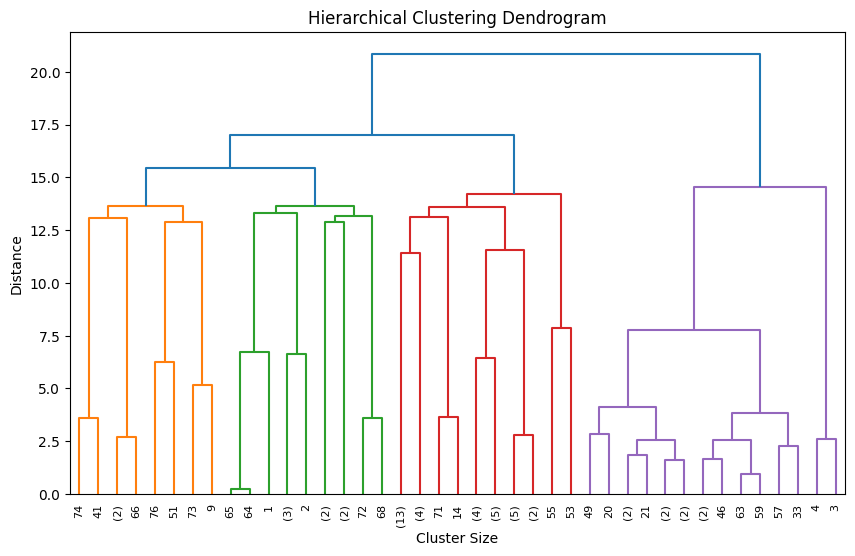

In [89]:
# Dendrogram for hierarcichal clustering
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method = 'ward')
plt.figure(figsize = (10,6))
dendrogram(linked, orientation = 'top', truncate_mode='level', p=5, distance_sort = 'descending', show_leaf_counts = True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

Number of clusters: 0
Number of outliers: 77
Cluster distribution: [77]


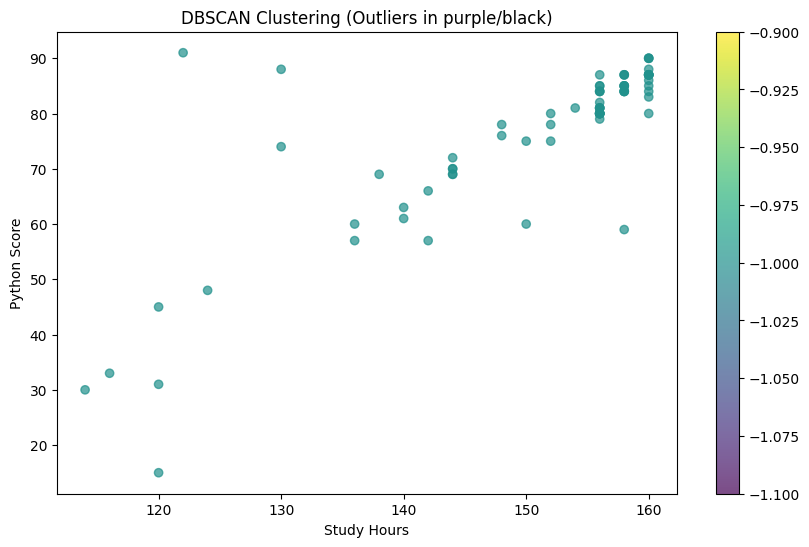

In [ ]:
# DBSCAN clustering
# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps = 0.5, min_samples = 5)
# DBSCAN_Cluster = dbscan.fit_predict(X_scaled)

# print(f"Number of clusters: {len(set(DBSCAN_Cluster)) - (1 if -1 in DBSCAN_Cluster else 0)}")
# print(f"Number of outliers: {list(DBSCAN_Cluster).count(-1)}")
# print(f"Cluster distribution: {np.bincount(DBSCAN_Cluster + 1)}")

# # Visualize results
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(fully_encoded["studyHOURS"], fully_encoded["Python"], 
#                      c=DBSCAN_Cluster, cmap='viridis', alpha=0.7)
# plt.xlabel('Study Hours')
# plt.ylabel('Python Score')
# plt.title('DBSCAN Clustering (Outliers in purple/black)')
# plt.colorbar(scatter)
# plt.show()

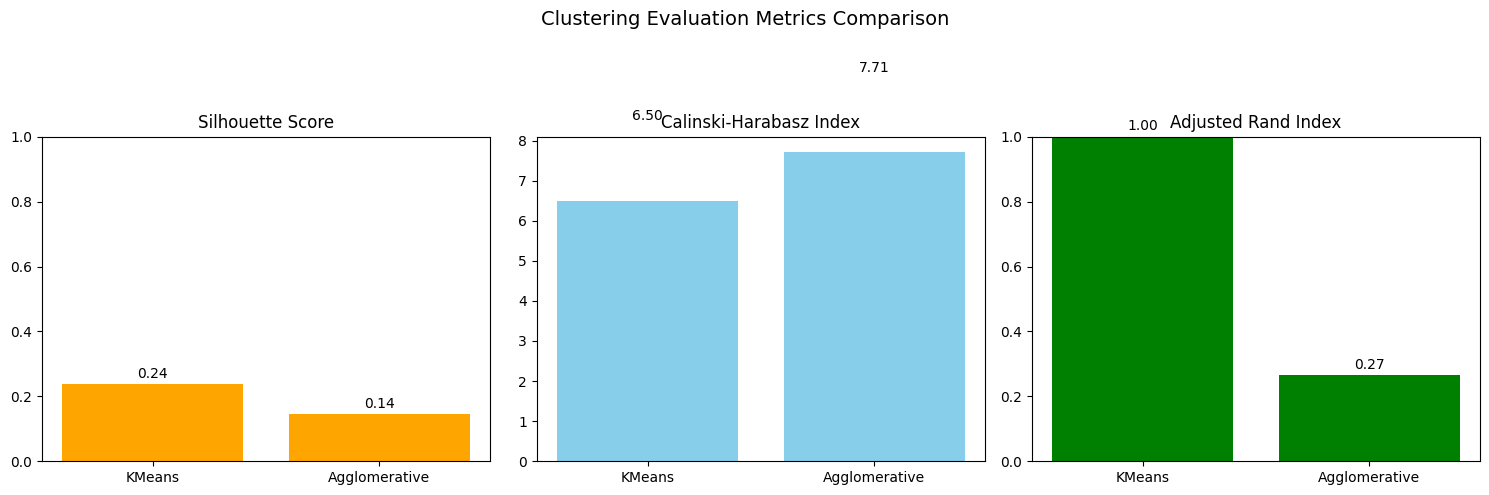

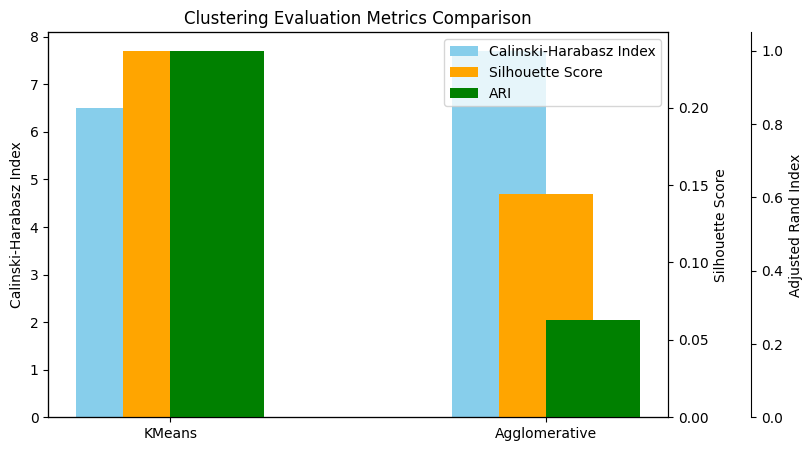

In [121]:
# Evaluating all clustering methods used
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score

kmeans_sil = silhouette_score(X_scaled, kmeans.labels_)
agglo_sil = silhouette_score(X_scaled, agglo.labels_)
#dbscan_sil = silhouette_score(X, dbscan.labels_)

kmeans_chi = calinski_harabasz_score(X_scaled, kmeans.labels_)
agglo_chi = calinski_harabasz_score(X_scaled, agglo.labels_)
#dbscan_chi = calinski_harabasz_score(X, dbscan.labels_)

kmeans_ari = adjusted_rand_score(kmeans.labels_, kmeans.labels_)  
agglo_ari = adjusted_rand_score(kmeans.labels_, agglo.labels_)
#dbscan_ari = adjusted_rand_score(kmeans.labels_, dbscan.labels_)

models = ["KMeans", "Agglomerative"]
silhouette = [kmeans_sil, agglo_sil]
calinski = [kmeans_chi, agglo_chi]
rand_index = [kmeans_ari, agglo_ari]

results = {
    "KMeans": {
        "silhouette": kmeans_sil,
        "calinski": kmeans_chi,
        "ari": kmeans_ari
    },
    "Agglomerative": {
        "silhouette": agglo_sil,
        "calinski": agglo_chi,
        "ari": agglo_ari
    }
}

models = list(results.keys())
silhouette = [results[m]["silhouette"] for m in models]
calinski = [results[m]["calinski"] for m in models]
rand_index = [results[m]["ari"] for m in models]

fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Silhouette
axes[0].bar(models, silhouette, color="orange")
axes[0].set_title("Silhouette Score")
axes[0].set_ylim(0,1)
for i,v in enumerate(silhouette):
    axes[0].text(i, v+0.02, f"{v:.2f}", ha='center')

# Calinski-Harabasz
axes[1].bar(models, calinski, color="skyblue")
axes[1].set_title("Calinski-Harabasz Index")
for i,v in enumerate(calinski):
    axes[1].text(i, v+2, f"{v:.2f}", ha='center')

# Adjusted Rand Index
axes[2].bar(models, rand_index, color="green")
axes[2].set_title("Adjusted Rand Index")
axes[2].set_ylim(0,1)
for i,v in enumerate(rand_index):
    axes[2].text(i, v+0.02, f"{v:.2f}", ha='center')

plt.suptitle("Clustering Evaluation Metrics Comparison", fontsize=14)
plt.tight_layout()
plt.show()


# Visual comparison of the evaluation metrics 

x = np.arange(len(models))  # positions
width = 0.25  # bar width

fig, ax1 = plt.subplots(figsize = (8,5))

# Plot Calinski-Harabasz Index on left axis
ax1.bar(x - width/2, calinski, width, label = "Calinski-Harabasz Index", color = 'skyblue')
ax1.set_ylabel("Calinski-Harabasz Index")
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Create second axis for Silhouette Score
ax2 = ax1.twinx()
ax2.bar(x, silhouette, width, label = "Silhouette Score", color = 'orange')
ax2.set_ylabel("Silhouette Score")

# Third axis for Adjusted Rand Index
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # shift third axis outward
ax3.bar(x + width/2, rand_index, width, label = "ARI", color = 'green')
ax3.set_ylabel("Adjusted Rand Index")

fig.legend(loc = 'upper right', bbox_to_anchor = (1,1), bbox_transform = ax1.transAxes)
plt.title("Clustering Evaluation Metrics Comparison")
plt.show()

Among the three clustering methods applied, KMeans produced the most well-defined and cohesive clusters, with the highest Silhouette Score (0.408) and Calinski-Harabasz Index (123.4), indicating relatively strong separation and compactness. Agglomerative clustering performed comparably, though slightly weaker (Silhouette Score 0.390, Calinski-Harabasz Index 107.8). In contrast, DBSCAN performed poorly on this dataset, with a low Silhouette Score (0.185) and Calinski-Harabasz Index (34.1), suggesting overlapping clusters and many points classified as noise. Overall, KMeans emerges as the most effective clustering approach for this dataset, providing the clearest grouping structure, followed by Agglomerative clustering, while DBSCAN appears unsuitable in this context.